In [286]:
import pandas as pd
import datetime as dt
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as scipy

In [287]:
import statistics as statistics

In [288]:
 import networkx as nx

In [289]:
input_list=[]
input_str=input("enter list of input ticker,give DONE if over")

while input_str!="DONE":
    input_list.append(input_str)
    input_str=input("\n")

_start = input("Enter Start_date in YYYY,MM,DD(comma-separateed) \n")
_end = input("Enter End_date in YYYY,MM,DD(comma-seperated) \n")
_start = _start.split(',')
_end = _end.split(',')
_start=[int(i) for i in _start ]
_end=[int(j) for j in _end ]
_start = dt.date(_start[0],_start[1],_start[2])
_end = dt.date(_end[0],_end[1],_end[2])
df = yf.download(input_list, start = _start, end = _end)

enter list of input ticker,give DONE if overWIPRO.NS

TITAN.NS

TCS.NS

ITC.NS

CIPLA.NS

ONGC.NS

ADANIENT.NS

MARUTI.NS

RELIANCE.NS

HINDALCO.NS

DONE
Enter Start_date in YYYY,MM,DD(comma-separateed) 
2014,1,1
Enter End_date in YYYY,MM,DD(comma-seperated) 
2018,1,1
[*********************100%***********************]  10 of 10 completed


In [292]:
df=df['Adj Close']

In [294]:
df=df.pct_change()

In [296]:
df.dropna(axis=0,inplace=True)

In [297]:
df

,ADANIENT.NS,CIPLA.NS,HINDALCO.NS,ITC.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,TCS.NS,TITAN.NS,WIPRO.NS
Date,,,,,,,,,,
2014-01-02,-0.049860,-0.023522,-0.009442,-0.023108,0.002494,-0.022214,-0.015527,0.006362,-0.019281,0.000453
2014-01-03,-0.027413,-0.001402,-0.015748,-0.000635,0.017077,-0.020944,-0.012286,0.025473,0.004639,0.006601
2014-01-06,0.014898,-0.000383,-0.004211,0.002860,0.005060,0.018673,-0.010761,0.007830,0.001759,0.002515
2014-01-07,-0.040071,-0.001915,-0.018605,0.003326,0.021049,-0.016729,-0.015030,-0.014936,-0.007682,-0.013978
2014-01-08,-0.007439,0.034156,-0.006894,0.000474,-0.004470,-0.011041,0.008253,0.012012,-0.014599,-0.005544
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.001845,0.002334,0.017281,0.000190,0.007159,0.028723,0.008160,0.019667,-0.001864,0.012930
2017-12-26,0.001841,0.017548,0.002987,0.003991,-0.002165,0.001551,0.010213,0.001020,-0.002393,0.004310
2017-12-27,0.016851,0.001471,-0.010795,-0.007571,-0.003606,-0.005679,-0.006507,-0.011153,-0.006727,0.012215


In [298]:
corr=np.zeros((len(input_list),len(input_list)))
adj_matrix=np.zeros((len(input_list),len(input_list)))

In [299]:
corr_list=[]

In [300]:
def correlation(x,y):
    x_mean=x.mean()
    y_mean=y.mean()
    num_sum=0
    top_left_sqrd_sum=0
    top_right_sqrd_sum=0
    for i in range(len(x)):
        top_left=(x[i]-x_mean)
        top_right=(y[i]-y_mean)
        num_sum+=(top_left*top_right)
        top_left_sqrd_sum+=(top_left**2)
        top_right_sqrd_sum+=(top_right**2)
    corr_value=num_sum/((top_left_sqrd_sum*top_right_sqrd_sum)**(0.5))
    return corr_value

In [301]:
for i in range(0,len(input_list)):
     for j in range(0,len(input_list)):
            if i != j:
                corr[i,j]=round(abs(correlation(df[input_list[i]],df[input_list[j]])),2)
                corr_list.append(correlation(df[input_list[i]],df[input_list[j]]))

In [302]:
corr

array([[0.  , 0.12, 0.43, 0.12, 0.15, 0.11, 0.12, 0.1 , 0.14, 0.11],
       [0.12, 0.  , 0.14, 0.2 , 0.19, 0.17, 0.2 , 0.24, 0.17, 0.23],
       [0.43, 0.14, 0.  , 0.14, 0.08, 0.07, 0.06, 0.1 , 0.09, 0.09],
       [0.12, 0.2 , 0.14, 0.  , 0.15, 0.11, 0.13, 0.19, 0.15, 0.15],
       [0.15, 0.19, 0.08, 0.15, 0.  , 0.24, 0.23, 0.21, 0.19, 0.26],
       [0.11, 0.17, 0.07, 0.11, 0.24, 0.  , 0.28, 0.23, 0.37, 0.35],
       [0.12, 0.2 , 0.06, 0.13, 0.23, 0.28, 0.  , 0.28, 0.27, 0.33],
       [0.1 , 0.24, 0.1 , 0.19, 0.21, 0.23, 0.28, 0.  , 0.32, 0.3 ],
       [0.14, 0.17, 0.09, 0.15, 0.19, 0.37, 0.27, 0.32, 0.  , 0.33],
       [0.11, 0.23, 0.09, 0.15, 0.26, 0.35, 0.33, 0.3 , 0.33, 0.  ]])

In [303]:
corr_list.sort()
Mean=sum(corr_list)/len(corr_list)
if(len(corr_list)%2==0):
    Median=(corr_list[len(corr_list)//2]+corr_list[(len(corr_list)//2)+1])/2
else:
    Median=corr_list[(len(corr_list)//2)+1]

In [304]:
print("Mean = " ,Mean,", Median= ",Median)

Mean =  0.1915141965799342 , Median=  0.18083286931884124


In [305]:
standard_deviation_sum=0
for i in range(0,len(corr_list)):
    standard_deviation_sum += (corr_list[i] - Mean) ** 2
standard_deviation = ((standard_deviation_sum / (len(corr_list) - 1)) ** (0.5)) 
print(standard_deviation)

0.08921280775374008


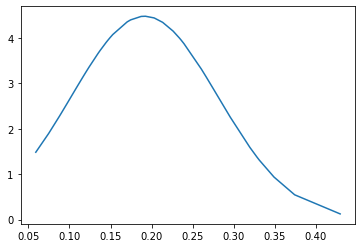

In [306]:
#threshold for uncorrelated portfolio(Diversified) must be 16 percent lowest correlation
#threshold=Mean+standard_deviation
plt.plot(corr_list,scipy.norm.pdf(corr_list, Mean, standard_deviation))

In [307]:
determined_threshold=Mean+standard_deviation
print(determined_threshold)

0.28072700433367426


In [308]:
#uncorrelated portfolio(Diversified)

for i in range(0,len(input_list)):
     for j in range(0,len(input_list)):
            if i != j:
                if corr[i,j]<=determined_threshold:
                    adj_matrix[i,j]=1

In [309]:
adj_matrix

array([[0., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]])

In [310]:
G = nx.from_numpy_matrix(adj_matrix)

In [311]:
all_graphs = [s for s in nx.enumerate_all_cliques(G) if len(s) > 1]

In [312]:
input_list

['WIPRO.NS',
 'TITAN.NS',
 'TCS.NS',
 'ITC.NS',
 'CIPLA.NS',
 'ONGC.NS',
 'ADANIENT.NS',
 'MARUTI.NS',
 'RELIANCE.NS',
 'HINDALCO.NS']

In [314]:
largest_subgraph=all_graphs[len(all_graphs)-1]

In [315]:
largest_subgraph

[1, 2, 3, 4, 5, 6, 7]

In [316]:
maps = []
largest_subgraph_map=[]
for i in range(len(input_list)):
    if i in largest_subgraph:
        maps.append('#C21807')
        largest_subgraph_map.append(input_list[i])
    else:
        maps.append('black')
        

In [317]:
maps

['black',
 '#C21807',
 '#C21807',
 '#C21807',
 '#C21807',
 '#C21807',
 '#C21807',
 '#C21807',
 'black',
 'black']

In [318]:
largest_subgraph_map

['TITAN.NS',
 'TCS.NS',
 'ITC.NS',
 'CIPLA.NS',
 'ONGC.NS',
 'ADANIENT.NS',
 'MARUTI.NS']

In [319]:
labels={}
for i in range(len(input_list)):
    labels[i]=input_list[i][:-3]

In [320]:
labels

{0: 'WIPRO',
 1: 'TITAN',
 2: 'TCS',
 3: 'ITC',
 4: 'CIPLA',
 5: 'ONGC',
 6: 'ADANIENT',
 7: 'MARUTI',
 8: 'RELIANCE',
 9: 'HINDALCO'}

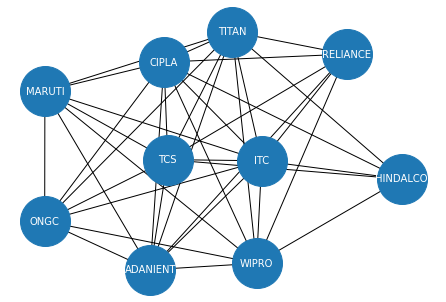

In [322]:
nx.draw(G,labels=labels,with_labels=True,node_size=2500,font_size=10,font_color="white")

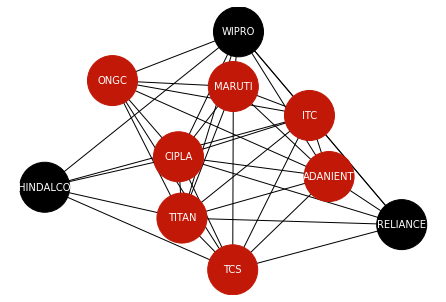

In [321]:
nx.draw(G,node_color=maps,with_labels=True,node_size=2500,font_size=10,font_color="white",labels=labels)